<img width="300px" src="https://cachimbo.pe/wp-content/uploads/2022/10/1-19.jpg"></img>

#**Matemática y Estadística para Ciencia de Datos**
## **Tema: Aprendizaje Profundo**
#### **Docente: Giron Rene Omar A.**

---------------

# Funciones de Activación

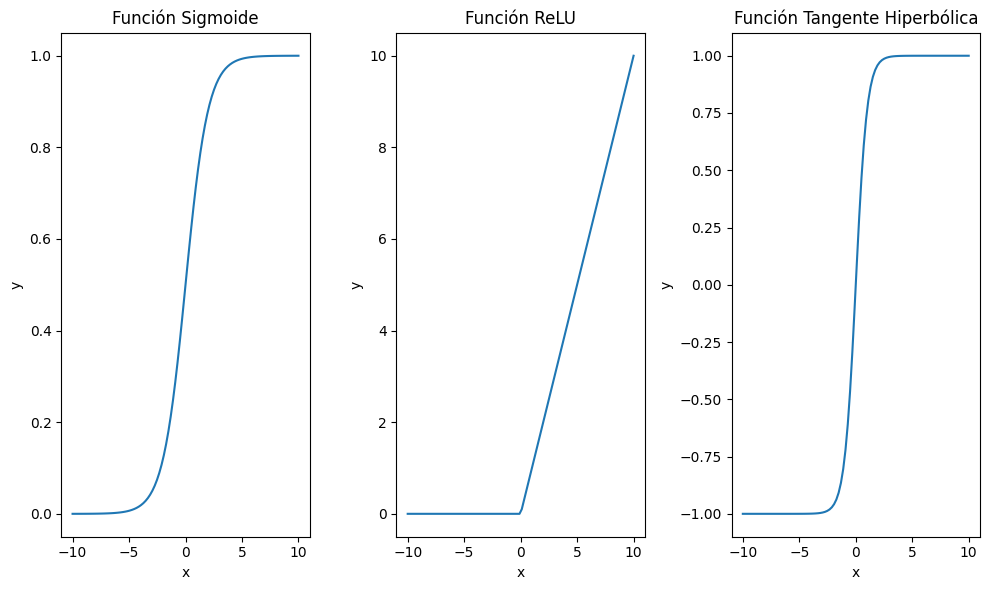

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función de activación sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Función de activación ReLU (Rectified Linear Unit)
def relu(x):
    return np.maximum(0, x)

# Función de activación tangente hiperbólica
def tanh(x):
    return np.tanh(x)

# Datos de ejemplo
x = np.linspace(-10, 10, 100)

# Calcular las funciones de activación
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Graficar las funciones de activación
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.plot(x, y_sigmoid)
plt.title('Función Sigmoide')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.plot(x, y_relu)
plt.title('Función ReLU')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.plot(x, y_tanh)
plt.title('Función Tangente Hiperbólica')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# Perceptron

## Perceptron 1

In [2]:
import numpy as np

def perceptron_learning_algorithm(P, N, max_iterations=1000):
    """
    Algoritmo de aprendizaje del perceptrón.

    Args:
        P (list): Lista de vectores de entrada con etiqueta 1.
        N (list): Lista de vectores de entrada con etiqueta 0.
        max_iterations (int): Número máximo de iteraciones para evitar bucles infinitos.

    Returns:
        np.ndarray: Vector de pesos aprendidos.
    """
    # Inicializar pesos aleatoriamente
    num_features = len(P[0])
    w = np.random.randn(num_features)
    w0=w
    # Concatenar P y N
    X = P + N
    y = [1] * len(P) + [0] * len(N)

    # Convertir a numpy arrays
    X = np.array(X)
    y = np.array(y)

    iterations = 0
    while iterations < max_iterations:
        misclassified = False
        for i in range(len(X)):
            if y[i] == 1 and np.dot(w, X[i]) < 0:
                w = w + X[i]
                misclassified = True
            elif y[i] == 0 and np.dot(w, X[i]) >= 0:
                w = w - X[i]
                misclassified = True

        # Si no hubo errores en la clasificación, el algoritmo ha convergido
        if not misclassified:
            print(f"Converged after {iterations} iterations.")
            break

        iterations += 1

    if iterations == max_iterations:
        print("Reached maximum iterations without convergence.")

    return w0,w

# Datos de ejemplo
P = [[2, 3], [4, 5]]
N = [[1, 0], [0, 1]]

# Ejecutar el algoritmo
w0, weights = perceptron_learning_algorithm(P, N)

print("Pesos aleatorios:", w0)
print("Pesos aprendidos:", weights)

Reached maximum iterations without convergence.
Pesos aleatorios: [-1.43712873 -0.31387834]
Pesos aprendidos: [0.56287127 1.68612166]


## Perceptron 2

In [3]:
import numpy as np

def perceptron_learning_algorithm(P, N, max_iterations=1000):
    """
    Algoritmo de aprendizaje del perceptrón.

    Args:
        P (list): Lista de vectores de entrada con etiqueta 1.
        N (list): Lista de vectores de entrada con etiqueta 0.
        max_iterations (int): Número máximo de iteraciones para evitar bucles infinitos.

    Returns:
        np.ndarray: Vector de pesos aprendidos.
    """
    # Inicializar pesos aleatoriamente
    num_features = len(P[0])
    w = np.random.randn(num_features + 1)  # +1 para el término de sesgo

    # Concatenar P y N
    X = P + N
    y = [1] * len(P) + [0] * len(N)

    # Convertir a numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Añadir un término de sesgo (columna de 1s) a X
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    iterations = 0
    while iterations < max_iterations:
        misclassified = False
        for i in range(len(X)):
            if y[i] == 1 and np.dot(w, X[i]) <= 0:
                w = w + X[i]
                misclassified = True
            elif y[i] == 0 and np.dot(w, X[i]) > 0:
                w = w - X[i]
                misclassified = True

        # Si no hubo errores en la clasificación, el algoritmo ha convergido
        if not misclassified:
            print(f"Converged after {iterations} iterations.")
            break

        iterations += 1

    if iterations == max_iterations:
        print("Reached maximum iterations without convergence.")

    return w

def predict(weights, X):
    """
    Función de predicción del perceptrón.

    Args:
        weights (np.ndarray): Vector de pesos aprendidos.
        X (list): Lista de vectores de entrada a clasificar.

    Returns:
        list: Lista de etiquetas predichas (0 o 1).
    """
    # Convertir a numpy array y añadir un término de sesgo (columna de 1s)
    X = np.array(X)
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    predictions = []
    for x in X:
        prediction = 1 if np.dot(weights, x) > 0 else 0
        predictions.append(prediction)

    return predictions

In [4]:
# Más datos de ejemplo
P = [[2, 3], [4, 5], [3, 6], [5, 8], [1, 4]]
N = [[1, 0], [0, 1], [2, 1], [1, 2], [0, 0]]

# Ejecutar el algoritmo
weights = perceptron_learning_algorithm(P, N)
print("Pesos aprendidos:", weights)

Converged after 4 iterations.
Pesos aprendidos: [-5.40799065 -0.95781653  2.48596339]


In [7]:
# Datos de prueba
X_test = [[2, 3], [4, 4], [1, 1], [6, 7]]
predictions = predict(weights, X_test)
print("Predicciones:", predictions)

Predicciones: [1, 1, 0, 1]


## Perceptron 3

Converged after 2 iterations.
Pesos aprendidos: [ 0.77717611 -1.6734391   2.38942024]
Probabilidades: [0.05198626687767058, 0.030775200674066312, 0.7952949033828575, 0.6359858691053996, 0.03887933782381526, 0.0355731883963386, 0.037009167727509146, 0.7941630232469511, 0.03763983838790255, 0.04362388553428554, 0.7614942083801594, 0.045430498089448455, 0.03145752782665135, 0.029066023149936438, 0.736650491404473, 0.032325537425969074, 0.032712181088199926, 0.8880215996669704, 0.8181853403096286, 0.035727883400390036]
Predicciones: [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]
Precisión: 1.0


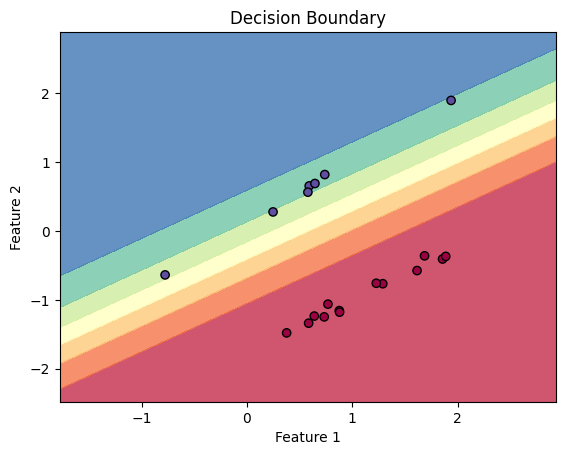

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def perceptron_learning_algorithm(P, N, max_iterations=1000):
    """
    Algoritmo de aprendizaje del perceptrón.

    Args:
        P (list): Lista de vectores de entrada con etiqueta 1.
        N (list): Lista de vectores de entrada con etiqueta 0.
        max_iterations (int): Número máximo de iteraciones para evitar bucles infinitos.

    Returns:
        np.ndarray: Vector de pesos aprendidos.
    """
    # Inicializar pesos aleatoriamente
    num_features = len(P[0])
    w = np.random.randn(num_features + 1)  # +1 para el término de sesgo

    # Concatenar P y N
    X = P + N
    y = [1] * len(P) + [0] * len(N)

    # Convertir a numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Añadir un término de sesgo (columna de 1s) a X
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    iterations = 0
    while iterations < max_iterations:
        misclassified = False
        for i in range(len(X)):
            if y[i] == 1 and np.dot(w, X[i]) <= 0:
                w = w + X[i]
                misclassified = True
            elif y[i] == 0 and np.dot(w, X[i]) > 0:
                w = w - X[i]
                misclassified = True

        # Si no hubo errores en la clasificación, el algoritmo ha convergido
        if not misclassified:
            print(f"Converged after {iterations} iterations.")
            break

        iterations += 1

    if iterations == max_iterations:
        print("Reached maximum iterations without convergence.")

    return w

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict_probabilities(weights, X):
    """
    Función de predicción del perceptrón que devuelve probabilidades.

    Args:
        weights (np.ndarray): Vector de pesos aprendidos.
        X (list): Lista de vectores de entrada a clasificar.

    Returns:
        list: Lista de probabilidades predichas.
    """
    # Convertir a numpy array y añadir un término de sesgo (columna de 1s)
    X = np.array(X)
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    probabilities = []
    for x in X:
        probability = sigmoid(np.dot(weights, x))
        probabilities.append(probability)

    return probabilities

# Generar datos de ejemplo usando sklearn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separar los datos de entrenamiento en P y N
P_train = [x.tolist() for x, label in zip(X_train, y_train) if label == 1]
N_train = [x.tolist() for x, label in zip(X_train, y_train) if label == 0]

# Entrenar el algoritmo
weights = perceptron_learning_algorithm(P_train, N_train)
print("Pesos aprendidos:", weights)

# Hacer predicciones de probabilidad en el conjunto de prueba
probabilities = predict_probabilities(weights, X_test)
print("Probabilidades:", probabilities)

# Convertir probabilidades a predicciones binarias
predictions = [1 if prob > 0.5 else 0 for prob in probabilities]
print("Predicciones:", predictions)

# Evaluar el rendimiento
accuracy = np.mean(predictions == y_test)
print("Precisión:", accuracy)

# Graficar los datos y la frontera de decisión
def plot_decision_boundary(X, y, weights):
    # Crear una malla para la gráfica
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Calcula la probabilidad para cada punto en la malla
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid = np.hstack((np.ones((grid.shape[0], 1)), grid))  # Añadir el término de sesgo
    probs = sigmoid(np.dot(grid, weights)).reshape(xx.shape)

    # Contorno y etiquetas de datos
    plt.contourf(xx, yy, probs, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Graficar la frontera de decisión
plot_decision_boundary(X_test, y_test, weights)


## RN con Sklearn

In [9]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generamos un conjunto de datos de círculos concéntricos
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=42)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un Perceptrón Multicapa (MLP) con una capa oculta de 64 neuronas
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=500, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=42, tol=1e-4)

# Entrenamos el MLP
mlp.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Evaluamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del Perceptrón Multicapa (MLP): {accuracy:.2f}")

Iteration 1, loss = 0.74962982
Iteration 2, loss = 0.74830865
Iteration 3, loss = 0.74619931
Iteration 4, loss = 0.74369256
Iteration 5, loss = 0.74103667
Iteration 6, loss = 0.73826313
Iteration 7, loss = 0.73540264
Iteration 8, loss = 0.73252373
Iteration 9, loss = 0.72984283
Iteration 10, loss = 0.72710474
Iteration 11, loss = 0.72452072
Iteration 12, loss = 0.72195028
Iteration 13, loss = 0.71931585
Iteration 14, loss = 0.71688081
Iteration 15, loss = 0.71454766
Iteration 16, loss = 0.71230935
Iteration 17, loss = 0.71009110
Iteration 18, loss = 0.70779096
Iteration 19, loss = 0.70589128
Iteration 20, loss = 0.70381655
Iteration 21, loss = 0.70187114
Iteration 22, loss = 0.69990362
Iteration 23, loss = 0.69814863
Iteration 24, loss = 0.69628662
Iteration 25, loss = 0.69455920
Iteration 26, loss = 0.69292390
Iteration 27, loss = 0.69122074
Iteration 28, loss = 0.68956990
Iteration 29, loss = 0.68804402
Iteration 30, loss = 0.68649772
Iteration 31, loss = 0.68499323
Iteration 32, los

c:\Users\dg_su\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


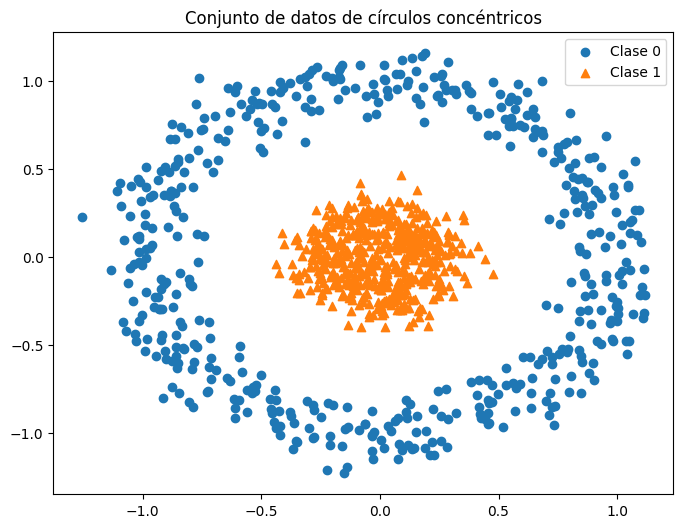

In [10]:
# Visualizamos los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', label='Clase 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='^', label='Clase 1')
plt.legend()
plt.title('Conjunto de datos de círculos concéntricos')
plt.show()

## RN full codigo

In [ ]:
# Ver el otro notebook